In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime
import datetime

In [3]:
def read_var(varname, filename):
    with open(filename, 'r') as f:
        data = f.readlines()

    for (i,x) in enumerate(data):
        if ' ' + varname in x: start = i
                
    end = i
    for (i,x) in enumerate(data[start:]):
        if not x.strip(): lenblock = i; break
    var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
    return var

In [4]:
def to_xr(var):
    var.to_xarray()

In [5]:
def filesanddates():    
    filename = "/Users/tobias/files.txt"
    with open(filename, 'r') as f:
        data = f.readlines()
    
    years = [int(d[0:4]) for d in data]
    months = [(d[5:7]) for d in data]
    monthss = ['DJ','JF','FM','MA','AM','MJ','JJ','JA','AS','SO','ON','ND']
    mon = [monthss.index(m) for m in months]
    test = [d[0:7] for d in data]
    date = [datetime.datetime(years[i], mon[i]+1, 1) for i in range(len(years))]
    
# filename = '/Users/tobias/Desktop/QBO Ancistrus/test10a.dat'
#    years = range(2002,2013)
#    year = [str(y) for y in range(2002,2013)]
#    months = ['DJ','JF','FM','MA','AM','MJ','JJ','JA','AS','SO','ON','ND']
#    month = [str(m) for m in months]
#    test = []
#    date = []
#    for y in year:
#        for m in month:
#            test.append( y + '_' + m )
#            date.append(datetime.datetime(years[year.index(y)], month.index(m)+1, 1))
#    
#    test = np.delete(test, [0,1,2,3,4,5,6,27,28,29,30,31,32,33,34,35,-8,-7,-6,-5,-4,-3,-2,-1])
#    date = np.delete(date, [0,1,2,3,4,5,6,27,28,29,30,31,32,33,34,35,-8,-7,-6,-5,-4,-3,-2,-1])
    return(test, date)

In [6]:
def readvars(filename):
    varname = 'v_phi'
    var = read_var(varname, filename)

    varname = 'v_z'
    varz = read_var(varname, filename)

    varname = 'model altitude'
    alt = read_var(varname, filename)

    varname = 'model latitude'
    lat = read_var(varname, filename)

    latlist = lat.T.to_xarray().to_array().values.ravel()
    latlist = latlist[~np.isnan(latlist)]
    #print(latlist)
    altlist = alt.T.to_xarray().to_array().values.ravel()
    altlist = altlist[~np.isnan(altlist)]
    #print(altlist)
    varlist = var.T.to_xarray().to_array().values.ravel()
    varlist.resize(len(altlist),len(latlist))

    varzlist = varz.T.to_xarray().to_array().values.ravel()
    varzlist.resize(len(altlist),len(latlist))

    #print(np.shape(varlist),np.shape(var))
    
    varlist = varlist[np.newaxis,...]
    varzlist = varzlist[np.newaxis,...]
    return(varlist,varzlist,altlist,latlist)

In [24]:
def readvars2(filename):
    varname = 'v_phi'
    var = read_var(varname, filename)

    varname = 'v_z'
    varz = read_var(varname, filename)

    varname = 'model altitude'
    alt = read_var(varname, filename)

    varname = 'model latitude'
    lat = read_var(varname, filename)

    latlist = lat.T.to_xarray().to_array().values.ravel()
    latlist = latlist[~np.isnan(latlist)]
    #print(latlist)
    altlist = alt.T.to_xarray().to_array().values.ravel()
    altlist = altlist[~np.isnan(altlist)]
    #print(altlist)
    varlist = var.T.to_xarray().to_array().values.ravel()
    varlist.resize(len(latlist),len(altlist))                  # <- changes here

    varzlist = varz.T.to_xarray().to_array().values.ravel()
    varzlist.resize(len(latlist),len(altlist))                 # <- changes here
    #print(np.shape(varlist),np.shape(var))
    
    varlist = varlist[np.newaxis,...]
    varzlist = varzlist[np.newaxis,...]
    return(varlist,varzlist,altlist,latlist)

In [ ]:
#df = pd.DataFrame({'year': [2014],
#...                    'month': [9],
#...                    'day': [6]})
#time = pd.to_datetime(df)

In [7]:
def mkds(varlist,varzlist,latlist, altlist,time):# define data with variable attributes
    data_vars = {'v_phi':(['time', 'alt', 'lat'], varlist, 
                         {'units': 'm/s', 
                          'long_name':'meridional velocity'}),
                 'v_z'  :(['time', 'alt', 'lat'], varzlist, 
                         {'units': 'm/s', 
                          'long_name':'vertical velocity'})}##

# define coordinates
    coords = {'time': (['time'], [time]),
         'lat': (['lat'], latlist),
         'alt': (['alt'], altlist)}

# define global attributes
    attrs = {'creation_date':str(datetime.datetime.now()), 
         'author':'Tobias Kerzenmacher', 
         'email':'kerzenmacher@kit.edu'}

# create dataset
    ds = xr.Dataset(data_vars=data_vars, 
                coords=coords, 
                attrs=attrs)
    return(ds)

In [37]:
def mkds3d(var, varname, varunit, varlongname, dim1, dimname1, dimunit1, dim2, dimname2, dimunit2, dim3, dimname3, dimunit3):# define data with variable attributes
    data_vars = {varname:([dim1, coordname2, coordname3], var, 
                         {'units': varunit, 
                          'long_name': varlongname})}##

# define coordinates
    coords = {dim1name: ([dim1name], dim1, {'units': dim1unit, 
                                            'long_name': dim1longname}),
              dim2name: ([dim2name], dim2,{'units': dim2unit, 
                                           'long_name': dim2longname}),
              dim3name: ([dim3name], dim3,{'units': dim3unit, 
                                           'long_name': dim3longname})}

# define global attributes
    attrs = {'creation_date':str(datetime.datetime.now()), 
         'author':'Tobias Kerzenmacher', 
         'email':'kerzenmacher@kit.edu'}

# create dataset
    ds = xr.Dataset(data_vars=data_vars, 
                coords=coords, 
                attrs=attrs)
    return(ds)

In [25]:
def mkds2(varlist,varzlist,latlist, altlist,time):# define data with variable attributes
    data_vars = {'v_phi':(['time', 'lat', 'alt'], varlist,       # <- changes here
                         {'units': 'm/s', 
                          'long_name':'meridional velocity'}),
                 'v_z'  :(['time', 'lat', 'alt'], varzlist,      # <- changes here
                         {'units': 'm/s', 
                          'long_name':'vertical velocity'})}

# define coordinates
    coords = {'time': (['time'], [time]),
         'lat': (['lat'], latlist),
         'alt': (['alt'], altlist)}

# define global attributes
    attrs = {'creation_date':str(datetime.datetime.now()), 
         'author':'Tobias Kerzenmacher', 
         'email':'kerzenmacher@kit.edu'}

# create dataset
    ds = xr.Dataset(data_vars=data_vars, 
                coords=coords, 
                attrs=attrs)
    return(ds)

In [8]:
test, date = filesanddates()
#test=test[0:2]
#date=date[0:2]
for i,t in enumerate(test):
    filename = '/Users/tobias/Mount/Ancistrus/test10a_'+t+'/output/test10a.dat'
    time = date[i]
    print(filename,time,i)
    varlist, varzlist, altlist, latlist = readvars(filename)
    #ds1 = mkds(varlist,varzlist,latlist, altlist,time)
    if i==0 : 
        print(varlist)
        ds = mkds(varlist,varzlist,latlist, altlist,time)
        print(ds)
    else:
        ds= xr.concat([ds,mkds(varlist,varzlist,latlist, altlist,time)],dim='time')
    #print(ds)


/Users/tobias/Mount/Ancistrus/test10a_2002_JA/output/test10a.dat 2002-08-01 00:00:00 0
[[[        nan  0.0000e+00 -6.5148e-02 -8.9371e-02 -9.3525e-02
   -9.7049e-02 -7.3135e-02 -6.6043e-02 -4.4846e-02 -3.6008e-02
   -2.4901e-02 -1.5632e-03  0.0000e+00  0.0000e+00  0.0000e+00
    0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
    0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
    3.6539e-02  2.8717e-02  3.4757e-02  2.2137e-02  1.2197e-02]
  [        nan  0.0000e+00 -6.6297e-02 -7.1211e-02 -7.8393e-02
   -7.8861e-02 -6.8973e-02 -5.7670e-02 -4.3771e-02 -3.2773e-02
   -2.1187e-02  1.9460e-04 -9.2457e-03 -2.5972e-02 -3.3573e-02
   -4.0518e-02 -5.1005e-02 -6.2629e-02 -6.5664e-02 -5.7523e-02
   -3.2194e-02 -1.3135e-02  9.9533e-03  2.4587e-02  2.8327e-02
    2.6660e-02  2.3756e-02  1.9769e-02  1.5075e-02  8.0974e-03]
  [ 0.0000e+00  0.0000e+00 -5.8212e-02 -6.2226e-02 -6.2375e-02
   -7.2085e-02 -6.6813e-02 -5.8523e-02 -4.7730e-02 -4.1354e-02
   -2.6404e-02 -1.8517e-02 -2

/Users/tobias/Mount/Ancistrus/test10a_2002_SO/output/test10a.dat 2002-10-01 00:00:00 2
/Users/tobias/Mount/Ancistrus/test10a_2002_ON/output/test10a.dat 2002-11-01 00:00:00 3
/Users/tobias/Mount/Ancistrus/test10a_2002_ND/output/test10a.dat 2002-12-01 00:00:00 4
/Users/tobias/Mount/Ancistrus/test10a_2003_DJ/output/test10a.dat 2003-01-01 00:00:00 5
/Users/tobias/Mount/Ancistrus/test10a_2003_JF/output/test10a.dat 2003-02-01 00:00:00 6
/Users/tobias/Mount/Ancistrus/test10a_2003_FM/output/test10a.dat 2003-03-01 00:00:00 7
/Users/tobias/Mount/Ancistrus/test10a_2003_MA/output/test10a.dat 2003-04-01 00:00:00 8
/Users/tobias/Mount/Ancistrus/test10a_2003_AM/output/test10a.dat 2003-05-01 00:00:00 9
/Users/tobias/Mount/Ancistrus/test10a_2003_MJ/output/test10a.dat 2003-06-01 00:00:00 10
/Users/tobias/Mount/Ancistrus/test10a_2003_JJ/output/test10a.dat 2003-07-01 00:00:00 11
/Users/tobias/Mount/Ancistrus/test10a_2003_JA/output/test10a.dat 2003-08-01 00:00:00 12
/Users/tobias/Mount/Ancistrus/test10a_20

/Users/tobias/Mount/Ancistrus/test10a_2012_FM/output/test10a.dat 2012-03-01 00:00:00 96
/Users/tobias/Mount/Ancistrus/test10a_2012_MA/output/test10a.dat 2012-04-01 00:00:00 97


In [26]:
test, date = filesanddates()
#test=test[0:2]
#date=date[0:2]
for i,t in enumerate(test):
    filename = '/Users/tobias/Mount/Ancistrus/test10a_'+t+'/output/test10a.dat'
    time = date[i]
    print(filename,time,i)
    varlist, varzlist, altlist, latlist = readvars2(filename)
    #ds1 = mkds2(varlist,varzlist,latlist, altlist,time)
    if i==0 : 
        #print(varlist)
        ds2 = mkds2(varlist,varzlist,latlist, altlist,time)
        #print(ds2)
    else:
        ds2= xr.concat([ds2,mkds2(varlist,varzlist,latlist, altlist,time)],dim='time')
    #print(ds2)


/Users/tobias/Mount/Ancistrus/test10a_2002_JA/output/test10a.dat 2002-08-01 00:00:00 0
/Users/tobias/Mount/Ancistrus/test10a_2002_AS/output/test10a.dat 2002-09-01 00:00:00 1
/Users/tobias/Mount/Ancistrus/test10a_2002_SO/output/test10a.dat 2002-10-01 00:00:00 2
/Users/tobias/Mount/Ancistrus/test10a_2002_ON/output/test10a.dat 2002-11-01 00:00:00 3
/Users/tobias/Mount/Ancistrus/test10a_2002_ND/output/test10a.dat 2002-12-01 00:00:00 4
/Users/tobias/Mount/Ancistrus/test10a_2003_DJ/output/test10a.dat 2003-01-01 00:00:00 5
/Users/tobias/Mount/Ancistrus/test10a_2003_JF/output/test10a.dat 2003-02-01 00:00:00 6
/Users/tobias/Mount/Ancistrus/test10a_2003_FM/output/test10a.dat 2003-03-01 00:00:00 7
/Users/tobias/Mount/Ancistrus/test10a_2003_MA/output/test10a.dat 2003-04-01 00:00:00 8
/Users/tobias/Mount/Ancistrus/test10a_2003_AM/output/test10a.dat 2003-05-01 00:00:00 9
/Users/tobias/Mount/Ancistrus/test10a_2003_MJ/output/test10a.dat 2003-06-01 00:00:00 10
/Users/tobias/Mount/Ancistrus/test10a_2003

/Users/tobias/Mount/Ancistrus/test10a_2012_DJ/output/test10a.dat 2012-01-01 00:00:00 94
/Users/tobias/Mount/Ancistrus/test10a_2012_JF/output/test10a.dat 2012-02-01 00:00:00 95
/Users/tobias/Mount/Ancistrus/test10a_2012_FM/output/test10a.dat 2012-03-01 00:00:00 96
/Users/tobias/Mount/Ancistrus/test10a_2012_MA/output/test10a.dat 2012-04-01 00:00:00 97


In [9]:
ds.v_phi

<xarray.DataArray 'v_phi' (time: 98, alt: 21, lat: 30)>
array([[[       nan,  0.       , -0.065148 , ...,  0.034757 ,
          0.022137 ,  0.012197 ],
        [       nan,  0.       , -0.066297 , ...,  0.019769 ,
          0.015075 ,  0.0080974],
        [ 0.       ,  0.       , -0.058212 , ...,  0.013476 ,
          0.012298 ,  0.0018496],
        ...,
        [-0.018485 , -0.0025512, -0.047269 , ...,  0.15571  ,
          0.095774 ,  0.043736 ],
        [-0.013752 , -0.0027364, -0.03119  , ...,  0.16038  ,
          0.09563  ,  0.038325 ],
        [-0.010733 , -0.0026299, -0.021683 , ...,  0.11734  ,
          0.05904  ,  0.034925 ]],

       [[-0.011241 ,  0.002048 , -0.023982 , ...,  0.061681 ,
          0.043287 ,  0.017914 ],
        [-0.016814 ,  0.0022357, -0.016925 , ...,  0.04853  ,
          0.037458 ,  0.0067309],
        [-0.016308 , -0.0025824, -0.020189 , ...,  0.018089 ,
          0.019855 , -0.0072122],
...
        [-0.022304 , -0.17558  , -0.18482  , ...,  0.059232 ,
          0.023201 , -0.028457 ],
        [-0.061898 , -0.13026  , -0.1627   , ..., -0.0065939,
         -0.0084814, -0.035511 ],
        [-0.071922 , -0.034634 , -0.10587  , ..., -0.042987 ,
         -0.031012 , -0.033599 ]],

       [[ 0.0054563, -0.0093246, -0.0025664, ...,  0.       ,
          0.       , -0.014849 ],
        [ 0.0092003, -0.013852 ,  0.011668 , ..., -0.018004 ,
         -0.0028202, -0.0094991],
        [ 0.0012499, -0.019783 ,  0.0065859, ...,  0.021676 ,
          0.019046 , -0.0080029],
        ...,
        [-0.0028605, -0.14662  , -0.18918  , ..., -0.21151  ,
         -0.082971 , -0.13787  ],
        [ 0.0067494, -0.13851  , -0.15006  , ..., -0.19829  ,
         -0.087612 , -0.1203   ],
        [-0.0093671, -0.13457  , -0.13911  , ..., -0.1734   ,
         -0.067836 , -0.14667  ]]])
Coordinates:
  * time     (time) datetime64[ns] 2002-08-01 2002-09-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
Attributes:
    units:      m/s
    long_name:  meridional velocity

In [10]:
ds.to_netcdf('ancistrus_2_test10a.nc')

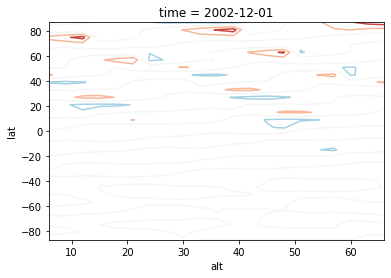

In [42]:
xr.plot.contour(ds2.v_z[4])

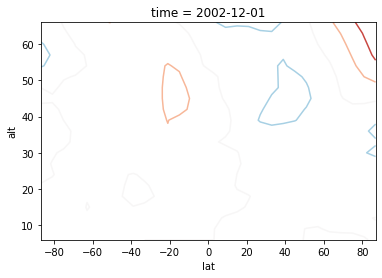

In [41]:
xr.plot.contour(ds.v_z[4])

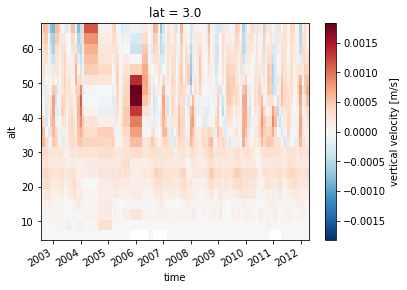

In [35]:
ds.v_z[:,:,15].T.plot()

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
ds2 = xr.open_dataset('ancistrus_test10a.nc')

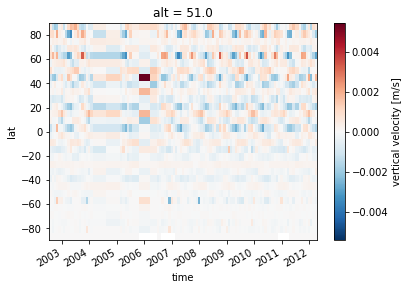

In [36]:
ds2.v_z[:,:,15].T.plot()

In [ ]:
test, date = filesanddates()
#test=test[0:2]
#date=date[0:2]
for i,t in enumerate(test):
    filename = '/Users/tobias/Mount/Ancistrus/test10a_'+t+'/output/test10a.dat'
    time = date[i]
    print(filename,time,i)
    varlist, varzlist, altlist, latlist = readvars(filename)
    #ds1 = mkds(varlist,varzlist,latlist, altlist,time)
    if i==0 : 
        print(varlist)
        ds = mkds3d(varlist,varzlist,latlist, altlist,time)
        print(ds)
    else:
        ds= xr.concat([ds,mkds(varlist,varzlist,latlist, altlist,time)],dim='time')
    #print(ds)

